# 유아동 그림 분석 AI 개발

## 구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 데이터 전처리

In [ ]:
# house 폴더 구조 만들기
!mkdir /content/drive/MyDrive/DBI_comp/house;
!mkdir /content/drive/MyDrive/DBI_comp/house/images;
!mkdir /content/drive/MyDrive/DBI_comp/house/images/train; mkdir /content/drive/MyDrive/DBI_comp/house/images/val

!mkdir /content/drive/MyDrive/DBI_comp/house/labels;
!mkdir /content/drive/MyDrive/DBI_comp/house/labels/train; mkdir /content/drive/MyDrive/DBI_comp/house/labels/val

# tree 폴더 구조 만들기
!mkdir /content/drive/MyDrive/DBI_comp/tree;
!mkdir /content/drive/MyDrive/DBI_comp/tree/images;
!mkdir /content/drive/MyDrive/DBI_comp/tree/images/train; mkdir /content/drive/MyDrive/DBI_comp/tree/images/val

!mkdir /content/drive/MyDrive/DBI_comp/tree/labels;
!mkdir /content/drive/MyDrive/DBI_comp/tree/labels/train; mkdir /content/drive/MyDrive/DBI_comp/tree/labels/val

# person 폴더 구조 만들기
!mkdir /content/drive/MyDrive/DBI_comp/person;
!mkdir /content/drive/MyDrive/DBI_comp/person/images;
!mkdir /content/drive/MyDrive/DBI_comp/person/images/train; mkdir /content/drive/MyDrive/DBI_comp/person/images/val

!mkdir /content/drive/MyDrive/DBI_comp/person/labels;
!mkdir /content/drive/MyDrive/DBI_comp/person/labels/train; mkdir /content/drive/MyDrive/DBI_comp/person/labels/val

In [ ]:
import glob, shutil
from sklearn.model_selection import train_test_split

folder_list = ['house', 'tree', 'person']

for folder in folder_list:
    image_path = f'/content/drive/MyDrive/DBI_comp/data/{folder}_640/' # 이미지가 있는 폴더 경로
    text_path = f'/content/drive/MyDrive/DBI_comp/bboxes_yolo_{folder}/'

    txt_files = glob.glob(text_path + '*.txt')
    files = [name.split('/')[-1].replace('.txt','') for name in txt_files] # txt 이름만 추출

    files.sort()

    # train, val 분할
    train_files, val_files = train_test_split(files, test_size=0.2, random_state=1)

    # train image, txt 이동
    for name in train_files:
        if (image_path+name+'.jpg'):
            jpg_path = image_path + name + '.jpg'
            txt_path = text_path + name + '.txt'
            shutil.copy(jpg_path, f'/content/drive/MyDrive/DBI_comp/{folder}/images/train/')
            shutil.copy(txt_path, f'/content/drive/MyDrive/DBI_comp/{folder}/labels/train/')

    # val image, txt 이동
    for name in val_files:
        if (image_path + name + '.jpg'):
            jpg_path = image_path + name + '.jpg'
            txt_path = text_path + name + '.txt'
            shutil.copy(jpg_path, f'/content/drive/MyDrive/DBI_comp/{folder}/images/val/')
            shutil.copy(txt_path, f'/content/drive/MyDrive/DBI_comp/{folder}/labels/val/')


In [ ]:
# 잘 복사됐는지 개수 확인
for folder in folder_list:
    print(folder)
    print('train image :', len(glob.glob(f'/content/drive/MyDrive/DBI_comp/{folder}/images/train/*.jpg')))
    print('train txt :', len(glob.glob(f'/content/drive/MyDrive/DBI_comp/{folder}/labels/train/*.txt')))

    print('val image :', len(glob.glob(f'/content/drive/MyDrive/DBI_comp/{folder}/images/val/*.jpg')))
    print('val txt :', len(glob.glob(f'/content/drive/MyDrive/DBI_comp/{folder}/labels/val/*.txt')))
    print()

house
train image : 752
train txt : 752
val image : 188
val txt : 188

tree
train image : 733
train txt : 733
val image : 184
val txt : 184

person
train image : 768
train txt : 768
val image : 193
val txt : 193



### 데이터셋 정보가 담긴 파일 생성

In [2]:
# yaml 파일 만들기
import yaml

house_dict = {0:'house', 1:'roof', 2:'window', 3:'door'}
tree_dict = {0:'tree', 1:'gnarl', 2:'crown', 3:'branch', 4:'root', 5:'fruit'}
person_dict = {0:'person', 1:'eye', 2:'mouth', 3:'arm', 4:'leg'}

house_d = {'path': '/content/drive/MyDrive/DBI_comp/house/',
           'names': house_dict,                           # class names
           'nc' : len(house_dict),                        # number of classes
           'train': 'images/train/',
           'val': 'images/val'
           }

tree_d = {'path': '/content/drive/MyDrive/DBI_comp/tree/',
          'names': tree_dict,                           # class names
          'nc' : len(tree_dict),                        # number of classes
          'train': 'images/train/',
          'val': 'images/val'
          }

person_d = {'path': '/content/drive/MyDrive/DBI_comp/person/',
            'names': person_dict,                           # class names
            'nc' : len(person_dict),                        # number of classes
            'train': 'images/train/',
            'val': 'images/val'
            }

print(yaml.safe_dump(house_d))
print(yaml.safe_dump(tree_d))
print(yaml.safe_dump(person_d))

with open('/content/house.yaml', 'w') as f :
    yaml.safe_dump(house_d, f, default_flow_style=False)
with open('/content/tree.yaml', 'w') as f :
    yaml.safe_dump(tree_d, f, default_flow_style=False)
with open('/content/person.yaml', 'w') as f :
    yaml.safe_dump(person_d, f, default_flow_style=False)

names:
  0: house
  1: roof
  2: window
  3: door
nc: 4
path: /content/drive/MyDrive/DBI_comp/house/
train: images/train/
val: images/val

names:
  0: tree
  1: gnarl
  2: crown
  3: branch
  4: root
  5: fruit
nc: 6
path: /content/drive/MyDrive/DBI_comp/tree/
train: images/train/
val: images/val

names:
  0: person
  1: eye
  2: mouth
  3: arm
  4: leg
nc: 5
path: /content/drive/MyDrive/DBI_comp/person/
train: images/train/
val: images/val



## 모델링


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
!pip install -r yolov5/requirements.txt  # install

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
from ultralytics import YOLO

### house

In [ ]:
model1 = YOLO(model='yolov5n.pt', task='detect')

In [ ]:
model1.train(data='/content/house.yaml',     # 데이터파일 path
            epochs=200,                               # 학습 epoch 수
            patience=20,                           # EarlyStopping의 patience # mAP[:50]:mAP[50:95] = 1:9 정도의 비율로 고려
            save=True,                              # train checkpoints와 predict results 저장
            project='train_house',                  # 프로젝트 이름
            # exist_ok=False,                         # 이미 존재한다면 overwrite할지
            pretrained=True,                        #
            optimizer='Adam',                       # [SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto] 중 선택 가능
            verbose=True,                           # verbose output 출력할지
            seed=1,                                 # 재현성을 위한 random seed
            )

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/house.yaml, epochs=200, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=train_house, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d835ed4b5b0>
fitness: 0.7744601320112718
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.85749,     0.75579,     0.67281,     0.74225])
names: {0: 'house', 1: 'roof', 2: 'window', 3: 'door'}
plot: True
results_dict: {'metrics/precision(B)': 0.8986147160036924, 'metrics/recall(B)': 0.8854812416743121, 'metrics/mAP50(B)': 0.9308205376557543, 'metrics/mAP50-95(B)': 0.7570867536063293, 'fitness': 0.7744601320112718}
save_dir: PosixPath('train_house/train')
speed: {'preprocess': 0.7736124890915891, 'inference': 1.962783488821476, 'loss': 0.0005136144922134724, 'postprocess': 0.6803261472823773}

### person

In [5]:
model2 = YOLO(model='yolov5n.pt', task='detect')

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

100%|██████████| 5.27M/5.27M [00:02<00:00, 2.65MB/s]


In [6]:
model2.train(data='/content/person.yaml',     # 데이터파일 path
            epochs=100,                               # 학습 epoch 수
            patience=10,                           # EarlyStopping의 patience # mAP[:50]:mAP[50:95] = 1:9 정도의 비율로 고려
            save=True,                              # train checkpoints와 predict results 저장
            project='train_person',                  # 프로젝트 이름
            # exist_ok=False,                         # 이미 존재한다면 overwrite할지
            pretrained=True,                        #
            optimizer='Adam',                       # [SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto] 중 선택 가능
            verbose=True,                           # verbose output 출력할지
            seed=1,                                 # 재현성을 위한 random seed
            )

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/person.yaml, epochs=100, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=train_person, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca5792c1180>
fitness: 0.5877873692551457
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.8329,     0.46005,      0.3944,     0.52173,     0.59046])
names: {0: 'person', 1: 'eye', 2: 'mouth', 3: 'arm', 4: 'leg'}
plot: True
results_dict: {'metrics/precision(B)': 0.8373967702540265, 'metrics/recall(B)': 0.7563370052151516, 'metrics/mAP50(B)': 0.8387079377807863, 'metrics/mAP50-95(B)': 0.5599073060856301, 'fitness': 0.5877873692551457}
save_dir: PosixPath('train_person/train')
speed: {'preprocess': 3.1896341649979507, 'inference': 3.5658117403020513, 'loss': 0.0008536126329491175, 'postprocess': 4.498689285831748}

In [ ]:
model2.train(data='/content/person.yaml',     # 데이터파일 path
            epochs=200,                               # 학습 epoch 수
            patience=20,                           # EarlyStopping의 patience # mAP[:50]:mAP[50:95] = 1:9 정도의 비율로 고려
            save=True,                              # train checkpoints와 predict results 저장
            project='train_person',                  # 프로젝트 이름
            # exist_ok=False,                         # 이미 존재한다면 overwrite할지
            pretrained=True,                        #
            optimizer='Adam',                       # [SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto] 중 선택 가능
            verbose=True,                           # verbose output 출력할지
            seed=1,                                 # 재현성을 위한 random seed
            )

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/person.yaml, epochs=200, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=train_person, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7abf099832e0>
fitness: 0.7233419066560203
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.95191,     0.63729,     0.54311,     0.63684,     0.73413])
names: {0: 'person', 1: 'eye', 2: 'mouth', 3: 'arm', 4: 'leg'}
plot: True
results_dict: {'metrics/precision(B)': 0.9233944870584649, 'metrics/recall(B)': 0.8798745798844735, 'metrics/mAP50(B)': 0.9275410672930555, 'metrics/mAP50-95(B)': 0.700653111029683, 'fitness': 0.7233419066560203}
save_dir: PosixPath('train_person/train')
speed: {'preprocess': 1.0991331209172857, 'inference': 2.8742335620939423, 'loss': 0.0006831371722443734, 'postprocess': 1.7338923222042735}

### tree

In [ ]:
model3 = YOLO(model='yolov5n.pt', task='detect')

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
model3.train(data='/content/tree.yaml',     # 데이터파일 path
            epochs=200,                               # 학습 epoch 수
            patience=20,                           # EarlyStopping의 patience # mAP[:50]:mAP[50:95] = 1:9 정도의 비율로 고려
            save=True,                              # train checkpoints와 predict results 저장
            project='train_tree',                  # 프로젝트 이름
            # exist_ok=False,                         # 이미 존재한다면 overwrite할지
            pretrained=True,                        #
            optimizer='Adam',                       # [SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto] 중 선택 가능
            verbose=True,                           # verbose output 출력할지
            seed=1,                                 # 재현성을 위한 random seed
            )


New https://pypi.org/project/ultralytics/8.0.195 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/tree.yaml, epochs=200, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=train_tree, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agn

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7abf3aadbac0>
fitness: 0.5689891220787209
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.90304,     0.38941,     0.75921,     0.28012,     0.58917,      0.3766])
names: {0: 'tree', 1: 'gnarl', 2: 'crown', 3: 'branch', 4: 'root', 5: 'fruit'}
plot: True
results_dict: {'metrics/precision(B)': 0.8091120407802289, 'metrics/recall(B)': 0.6787018887957023, 'metrics/mAP50(B)': 0.7435670770172121, 'metrics/mAP50-95(B)': 0.5495915715299996, 'fitness': 0.5689891220787209}
save_dir: PosixPath('train_tree/train')
speed: {'preprocess': 0.9645677131155264, 'inference': 3.575080114862193, 'loss': 0.00067120013029679, 'postprocess': 2.051143542579983}

# 예측 및 csv

## house

In [5]:
# 가중치 적용한 최종 모델

model1 = YOLO(model='/content/drive/MyDrive/DBI_comp/best_house.pt', task='detect')

In [41]:
import glob
import pandas as pd
house_df = pd.DataFrame(columns=['id','door_yn','loc','roof_yn','window_cnt','size'])

def house(results, image_path):

    for img_result in results:
        # 이미지당 결과에서 좌표 정보 추출
        # xywh : 바운딩 박스의 중심 x 좌표, 바운딩 박스의 중심 y 좌표, 바운딩 박스의 너비 (width), 바운딩 박스의 높이 (height)
        boxes = img_result.boxes.xywhn # normalization
        cls = img_result.boxes.cls.int()
        orig_shape = img_result.orig_shape
        # count = 1
        id = image_path.split('/')[-1].replace('.jpg','')

        df = [id,'n','center','n','absence','middle']

        # 클래스별로 좌표 정보 출력
        for c in cls.unique():
            class_boxes = boxes[cls == c]
            if c==0: # house
                # count = len(class_boxes)
                if class_boxes[0][0] < 1/3:
                    df[2] = 'left'
                elif class_boxes[0][0] > (2/3):
                    df[2] = 'right'
                else:
                    df[2] = 'center'

                if (class_boxes[0][2]*class_boxes[0][3]) >= 0.45: #0.6
                    df[5] = 'big'
                elif (class_boxes[0][2]*class_boxes[0][3]) < 0.12: #0.16
                    df[5] = 'small'
                else:
                    df[5] = 'middle'
            if c==1: # roof
                df[3] = 'y'
            if c==2: # window
                # if 0 < len(class_boxes)/count <= 2:
                if 0 < len(class_boxes) <= 2:
                    df[4] = '1 or 2'
                # elif len(class_boxes)/count > 2:
                elif len(class_boxes) > 2:
                    df[4] = 'more than 3'
            if c==3: # door
                df[1]='y'

    return df


# 여러개의 test용 이미지파일
path = '/content/drive/MyDrive/DBI_comp/test/house/'
image = glob.glob(path + '*.jpg')

for image_path in image:
    results = model1.predict(source=image_path,
                            conf=0.4,
                            iou=0.7,
                            save=True,
                            # line_width=3
                            )
    house_df.loc[len(house_df)] = house(results, image_path)

house_df


image 1/1 /content/drive/MyDrive/DBI_comp/test/house/3_11_23071_house.jpg: 480x640 1 house, 1 roof, 1 window, 1 door, 197.2ms
Speed: 8.4ms preprocess, 197.2ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/DBI_comp/test/house/3_11_23064_house.jpg: 480x640 1 house, 1 roof, 3 windows, 1 door, 160.9ms
Speed: 5.8ms preprocess, 160.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/DBI_comp/test/house/3_11_23068_house.jpg: 480x640 1 house, 1 roof, 9 windows, 178.0ms
Speed: 5.8ms preprocess, 178.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

image 1/1 /content/drive/MyDrive/DBI_comp/test/house/3_11_23065_house.jpg: 480x640 3 houses, 3 roofs, 12 windows, 2 doors, 145.7ms
Speed: 4.7ms preprocess, 145.7ms inference, 1.1ms postprocess per image at shape (1, 3, 

,id,door_yn,loc,roof_yn,window_cnt,size
0,3_11_23071_house,y,center,y,1 or 2,middle
1,3_11_23064_house,y,center,y,more than 3,middle
2,3_11_23068_house,n,center,y,more than 3,big
3,3_11_23065_house,y,left,y,more than 3,middle
4,3_11_23067_house,y,center,y,more than 3,middle
5,3_11_23063_house,n,center,y,absence,small
6,3_11_23069_house,y,left,y,1 or 2,middle
7,3_11_23066_house,y,right,y,more than 3,middle
8,3_11_23070_house,y,left,y,1 or 2,middle
9,3_11_23062_house,n,center,y,absence,small


In [42]:
house_df.to_csv('submission_house.csv', index = False)

In [43]:
# 실제값과 예측값의 비교
real_df = pd.read_csv('/content/drive/MyDrive/DBI_comp/dbi_house.csv')
new_df = pd.merge(house_df, real_df, how='inner', on='id')
new_df

,id,door_yn_x,loc_x,roof_yn_x,window_cnt_x,size_x,door_yn_y,loc_y,roof_yn_y,window_cnt_y,size_y
0,3_11_23071_house,y,center,y,1 or 2,middle,y,center,y,1 or 2,middle
1,3_11_23064_house,y,center,y,more than 3,middle,y,center,y,more than 3,middle
2,3_11_23068_house,n,center,y,more than 3,big,n,center,y,more than 3,big
3,3_11_23065_house,y,left,y,more than 3,middle,y,left,y,more than 3,middle
4,3_11_23067_house,y,center,y,more than 3,middle,y,center,y,more than 3,middle
5,3_11_23063_house,n,center,y,absence,small,n,center,y,absence,small
6,3_11_23069_house,y,left,y,1 or 2,middle,y,left,y,1 or 2,middle
7,3_11_23066_house,y,right,y,more than 3,middle,y,center,y,1 or 2,middle
8,3_11_23070_house,y,left,y,1 or 2,middle,y,left,y,1 or 2,middle
9,3_11_23062_house,n,center,y,absence,small,n,center,y,absence,small


In [44]:
merge_df = new_df.loc[new_df['size_x'] != new_df['size_y']]
print(merge_df[['size_x', 'size_y']].value_counts())

size_x  size_y
middle  big       3
        small     1
small   middle    1
dtype: int64


In [45]:
from sklearn.metrics import accuracy_score, classification_report

cols = ['door_yn','loc','roof_yn','window_cnt','size']
accuracy_list = []
report_list = []

for col in cols:
    accuracy_list.append(accuracy_score(new_df[f'{col}_y'], new_df[f'{col}_x']))
    report_list.append(classification_report(new_df[f'{col}_y'], new_df[f'{col}_x']))

for i in range(len(cols)):
    print(cols[i], ':', accuracy_list[i])

for i in range(len(cols)):
    print(cols[i], ':\n', report_list[i])

door_yn : 0.96
loc : 0.94
roof_yn : 0.94
window_cnt : 0.82
size : 0.9
door_yn :
               precision    recall  f1-score   support

           n       0.93      0.93      0.93        15
           y       0.97      0.97      0.97        35

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50

loc :
               precision    recall  f1-score   support

      center       0.98      0.98      0.98        42
        left       0.83      0.83      0.83         6
       right       0.50      0.50      0.50         2

    accuracy                           0.94        50
   macro avg       0.77      0.77      0.77        50
weighted avg       0.94      0.94      0.94        50

roof_yn :
               precision    recall  f1-score   support

           n       0.00      0.00      0.00         1
           y       0.98      0.96      0.97        49

    accuracy                 

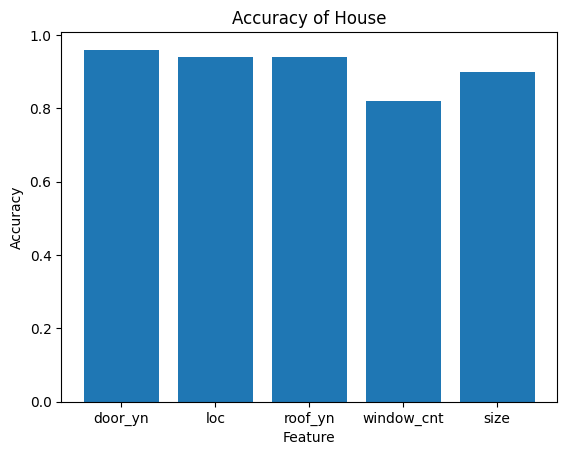

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(cols)), accuracy_list)
plt.xticks(np.arange(len(cols)), cols)
plt.title('Accuracy of House')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.show()

## person

In [24]:
# 가중치 적용한 최종 모델

model2 = YOLO(model='/content/drive/MyDrive/DBI_comp/best_person.pt', task='detect')

In [35]:
import pandas as pd
person_df = pd.DataFrame(columns=['id','eye_yn','leg_yn','loc','mouth_yn','size','arm_yn'])

def person(results, image_path):

    for img_result in results:
        # 이미지당 결과에서 좌표 정보 추출
        # xywh : 바운딩 박스의 중심 x 좌표, 바운딩 박스의 중심 y 좌표, 바운딩 박스의 너비 (width), 바운딩 박스의 높이 (height)
        boxes = img_result.boxes.xywhn # normalization
        cls = img_result.boxes.cls.int()
        orig_shape = img_result.orig_shape
        id = image_path.split('/')[-1].replace('.jpg','')

        df = [id,'n','n','center','n','middle','n']

        # 클래스별로 좌표 정보 출력
        for c in cls.unique():
            class_boxes = boxes[cls == c]
            if c==0: # person
                if class_boxes[0][0] < 1/3:
                    df[3] = 'left'
                elif class_boxes[0][0] > (2/3):
                    df[3] = 'right'
                else:
                    df[3] = 'center'

                if (class_boxes[0][2]*class_boxes[0][3]) >= 0.3: # 0.4
                    df[5] = 'big'
                elif (class_boxes[0][2]*class_boxes[0][3]) < 0.12: # 0.16
                    df[5] = 'small'
                else:
                    df[5] = 'middle'
            if c==1: # eye
                df[1] = 'y'
            if c==2: # mouth
                df[4] = 'y'
            if c==3: # arm
                df[6]='y'
            if c==4: # leg
                df[2] = 'y'

    return df

# 여러개의 이미지파일
path = '/content/drive/MyDrive/DBI_comp/test/person/'
image = glob.glob(path + '*.jpg')

for image_path in image:
    results = model2.predict(source=image_path,
                            conf=0.4,
                            iou=0.7,
                            save=True,
                            # line_width=3
                            )
    person_df.loc[len(person_df)] = person(results, image_path)

person_df



image 1/1 /content/drive/MyDrive/DBI_comp/test/person/3_11_23071_person.jpg: 480x640 1 person, 1 eye, 1 mouth, 1 arm, 1 leg, 146.6ms
Speed: 6.6ms preprocess, 146.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4

image 1/1 /content/drive/MyDrive/DBI_comp/test/person/3_11_23066_person.jpg: 480x640 1 person, 2 eyes, 1 mouth, 2 arms, 1 leg, 134.3ms
Speed: 4.5ms preprocess, 134.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4

image 1/1 /content/drive/MyDrive/DBI_comp/test/person/3_11_23062_person.jpg: 480x640 1 person, 1 eye, 2 arms, 1 leg, 135.3ms
Speed: 4.4ms preprocess, 135.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4

image 1/1 /content/drive/MyDrive/DBI_comp/test/person/3_11_23070_person.jpg: 480x640 1 person, 1 eye, 1 mouth, 2 arms, 1 leg, 127.6ms
Speed: 4.5ms preprocess, 127.6ms inference, 1.0ms postprocess

,id,eye_yn,leg_yn,loc,mouth_yn,size,arm_yn
0,3_11_23071_person,y,y,center,y,small,y
1,3_11_23066_person,y,y,center,y,middle,y
2,3_11_23062_person,y,y,center,n,small,y
3,3_11_23070_person,y,y,center,y,small,y
4,3_11_23068_person,n,y,center,n,middle,y
5,3_11_23063_person,y,y,center,y,middle,y
6,3_11_23067_person,y,y,center,y,big,y
7,3_11_23064_person,y,y,center,y,small,y
8,3_11_23065_person,y,y,center,y,middle,y
9,3_11_23069_person,y,y,left,y,small,y


In [36]:
person_df.to_csv('submission_person.csv', index = False)

In [37]:
# 실제값과 예측값의 비교
real_df = pd.read_csv('/content/drive/MyDrive/DBI_comp/dbi_person.csv')
new_df = pd.merge(person_df, real_df, how='inner', on='id')
new_df

,id,eye_yn_x,leg_yn_x,loc_x,mouth_yn_x,size_x,arm_yn_x,eye_yn_y,leg_yn_y,loc_y,mouth_yn_y,size_y,arm_yn_y
0,3_11_23071_person,y,y,center,y,small,y,y,y,center,y,middle,y
1,3_11_23066_person,y,y,center,y,middle,y,y,y,center,y,middle,y
2,3_11_23062_person,y,y,center,n,small,y,y,y,left,n,small,y
3,3_11_23070_person,y,y,center,y,small,y,y,y,center,y,middle,y
4,3_11_23068_person,n,y,center,n,middle,y,y,y,center,y,middle,y
5,3_11_23063_person,y,y,center,y,middle,y,y,y,center,y,middle,y
6,3_11_23067_person,y,y,center,y,big,y,y,y,center,y,big,y
7,3_11_23064_person,y,y,center,y,small,y,y,y,center,y,middle,y
8,3_11_23065_person,y,y,center,y,middle,y,y,y,center,y,middle,y
9,3_11_23069_person,y,y,left,y,small,y,y,y,center,y,small,y


In [38]:
merge_df = new_df.loc[new_df['size_x'] != new_df['size_y']]
print(merge_df[['size_x', 'size_y']].value_counts())

size_x  size_y
small   middle    3
middle  big       2
big     middle    1
middle  small     1
dtype: int64


In [39]:
from sklearn.metrics import accuracy_score, classification_report

cols = ['eye_yn','leg_yn','loc','mouth_yn','size','arm_yn']
accuracy_list = []
report_list = []

for col in cols:
    accuracy_list.append(accuracy_score(new_df[f'{col}_y'], new_df[f'{col}_x']))
    report_list.append(classification_report(new_df[f'{col}_y'], new_df[f'{col}_x']))

for i in range(len(cols)):
    print(cols[i], ':', accuracy_list[i])

for i in range(len(cols)):
    print(cols[i], ':\n', report_list[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


eye_yn : 0.95
leg_yn : 0.975
loc : 0.9
mouth_yn : 0.9
size : 0.825
arm_yn : 0.95
eye_yn :
               precision    recall  f1-score   support

           n       0.00      0.00      0.00         0
           y       1.00      0.95      0.97        40

    accuracy                           0.95        40
   macro avg       0.50      0.47      0.49        40
weighted avg       1.00      0.95      0.97        40

leg_yn :
               precision    recall  f1-score   support

           n       0.75      1.00      0.86         3
           y       1.00      0.97      0.99        37

    accuracy                           0.97        40
   macro avg       0.88      0.99      0.92        40
weighted avg       0.98      0.97      0.98        40

loc :
               precision    recall  f1-score   support

      center       0.92      0.97      0.95        36
        left       0.00      0.00      0.00         3
       right       1.00      1.00      1.00         1

    accuracy        

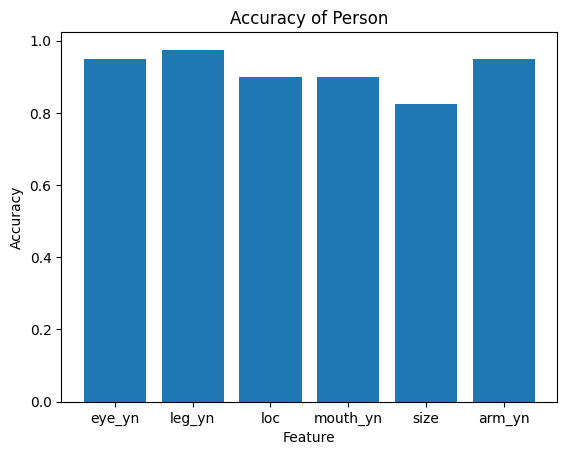

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(cols)), accuracy_list)
plt.xticks(np.arange(len(cols)), cols)
plt.title('Accuracy of Person')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.show()

## tree

In [4]:
# 가중치 적용한 최종 모델

model3 = YOLO(model='/content/drive/MyDrive/DBI_comp/best_tree.pt', task='detect')

In [5]:
import pandas as pd
import glob
tree_df = pd.DataFrame(columns=['id','branch_yn','root_yn','crown_yn','fruit_yn','gnarl_yn','loc','size'])

def tree(results, image_path):

    for img_result in results:
        # 이미지당 결과에서 좌표 정보 추출
        # xywh : 바운딩 박스의 중심 x 좌표, 바운딩 박스의 중심 y 좌표, 바운딩 박스의 너비 (width), 바운딩 박스의 높이 (height)
        boxes = img_result.boxes.xywhn # normalization
        cls = img_result.boxes.cls.int()
        orig_shape = img_result.orig_shape

        df = [0,'n','n','n','n','n','center','middle']
        df[0] = image_path.split('/')[-1].replace('.jpg','')

        # 클래스별로 좌표 정보 출력
        for c in cls.unique():
            class_boxes = boxes[cls == c]
            if c==0: # tree
                if class_boxes[0][0] < 1/3:
                    df[6] = 'left'
                elif class_boxes[0][0] > (2/3):
                    df[6] = 'right'
                else:
                    df[6] = 'center'

                if (class_boxes[0][2]*class_boxes[0][3]) >= 0.6:
                    df[7] = 'big'
                elif (class_boxes[0][2]*class_boxes[0][3]) < 0.16:
                    df[7] = 'small'
                else:
                    df[7] = 'middle'
            if c==1: # gnarl
                df[5] = 'y'
            if c==2: # crown
                df[3] = 'y'
            if c==3: # branch
                df[1]='y'
            if c==4: # root
                df[2] = 'y'
            if c==5: # fruit
                df[4] = 'y'

    return df

# 여러개의 이미지파일
path = '/content/drive/MyDrive/DBI_comp/test/tree/'
image = glob.glob(path + '*.jpg')

for image_path in image:
    results = model3.predict(source=image_path,
                            conf=0.4,
                            iou=0.7,
                            save=True,
                            # line_width=3
                            )
    tree_df.loc[len(tree_df)] = tree(results, image_path)

tree_df


image 1/1 /content/drive/MyDrive/DBI_comp/test/tree/3_11_23064_tree.jpg: 480x640 1 tree, 1 crown, 1 root, 15 fruits, 101.8ms
Speed: 4.8ms preprocess, 101.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/DBI_comp/test/tree/3_11_23063_tree.jpg: 480x640 1 tree, 1 crown, 1 root, 3 fruits, 13.1ms
Speed: 5.4ms preprocess, 13.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/DBI_comp/test/tree/3_11_23070_tree.jpg: 480x640 1 tree, 1 crown, 22 fruits, 15.8ms
Speed: 4.5ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2

image 1/1 /content/drive/MyDrive/DBI_comp/test/tree/3_11_23071_tree.jpg: 480x640 1 tree, 1 crown, 9 fruits, 13.1ms
Speed: 4.0ms preprocess, 13.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved 

,id,branch_yn,root_yn,crown_yn,fruit_yn,gnarl_yn,loc,size
0,3_11_23064_tree,n,y,y,y,n,center,middle
1,3_11_23063_tree,n,y,y,y,n,center,middle
2,3_11_23070_tree,n,n,y,y,n,left,small
3,3_11_23071_tree,n,n,y,y,n,center,middle
4,3_11_23066_tree,n,n,y,y,n,center,middle
5,3_11_23069_tree,n,n,y,y,n,center,middle
6,3_11_23062_tree,n,n,y,n,n,left,small
7,3_11_23067_tree,n,n,y,y,n,center,middle
8,3_11_23068_tree,n,n,y,n,n,center,small
9,3_11_23065_tree,n,n,y,y,n,left,small


In [6]:
tree_df.to_csv('submission_tree.csv', index = False)

In [7]:
# 실제값과 예측값의 비교
real_df = pd.read_csv('/content/drive/MyDrive/DBI_comp/dbi_tree.csv')
new_df = pd.merge(tree_df, real_df, how='inner', on='id')
new_df

,id,branch_yn_x,root_yn_x,crown_yn_x,fruit_yn_x,gnarl_yn_x,loc_x,size_x,branch_yn_y,root_yn_y,crown_yn_y,fruit_yn_y,gnarl_yn_y,loc_y,size_y
0,3_11_23064_tree,n,y,y,y,n,center,middle,n,y,y,y,n,center,middle
1,3_11_23063_tree,n,y,y,y,n,center,middle,n,y,y,y,n,center,middle
2,3_11_23070_tree,n,n,y,y,n,left,small,n,n,y,y,n,left,middle
3,3_11_23071_tree,n,n,y,y,n,center,middle,n,n,y,y,n,center,middle
4,3_11_23066_tree,n,n,y,y,n,center,middle,n,n,y,y,n,center,big
5,3_11_23069_tree,n,n,y,y,n,center,middle,n,n,y,y,n,left,middle
6,3_11_23062_tree,n,n,y,n,n,left,small,n,n,y,n,n,center,small
7,3_11_23067_tree,n,n,y,y,n,center,middle,y,n,y,y,n,right,middle
8,3_11_23068_tree,n,n,y,n,n,center,small,n,n,y,n,n,center,small
9,3_11_23065_tree,n,n,y,y,n,left,small,n,n,y,y,n,left,middle


In [8]:
merge_df = new_df.loc[new_df['size_x'] != new_df['size_y']]
print(merge_df[['size_x', 'size_y']].value_counts())

size_x  size_y
small   middle    6
middle  small     3
        big       1
dtype: int64


In [11]:
from sklearn.metrics import accuracy_score, classification_report

cols = ['branch_yn','root_yn','crown_yn','fruit_yn','gnarl_yn','loc','size']
accuracy_list = []
report_list = []

for col in cols:
    accuracy_list.append(accuracy_score(new_df[f'{col}_y'], new_df[f'{col}_x']))
    report_list.append(classification_report(new_df[f'{col}_y'], new_df[f'{col}_x']))

for i in range(len(cols)):
    print(cols[i], ':', accuracy_list[i])

for i in range(len(cols)):
    print(cols[i], ':\n', report_list[i])

branch_yn : 0.9
root_yn : 0.95
crown_yn : 0.925
fruit_yn : 0.9
gnarl_yn : 0.95
loc : 0.9
size : 0.75
branch_yn :
               precision    recall  f1-score   support

           n       0.90      0.96      0.93        27
           y       0.91      0.77      0.83        13

    accuracy                           0.90        40
   macro avg       0.90      0.87      0.88        40
weighted avg       0.90      0.90      0.90        40

root_yn :
               precision    recall  f1-score   support

           n       0.94      1.00      0.97        32
           y       1.00      0.75      0.86         8

    accuracy                           0.95        40
   macro avg       0.97      0.88      0.91        40
weighted avg       0.95      0.95      0.95        40

crown_yn :
               precision    recall  f1-score   support

           n       0.70      1.00      0.82         7
           y       1.00      0.91      0.95        33

    accuracy                           0.93  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


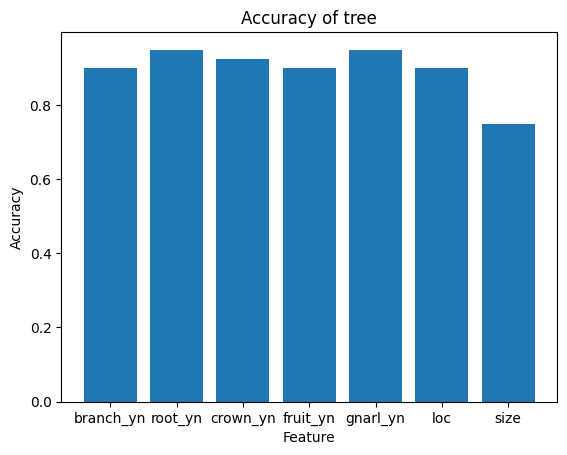

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(cols)), accuracy_list)
plt.xticks(np.arange(len(cols)), cols)
plt.title('Accuracy of tree')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.show()